In [1]:
from qiskit import *

In [4]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

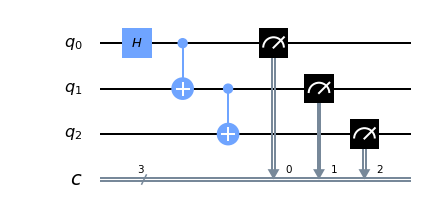

In [7]:
%matplotlib inline
circuit.draw(output="mpl")

In [12]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()

In [13]:
from qiskit.visualization import plot_histogram

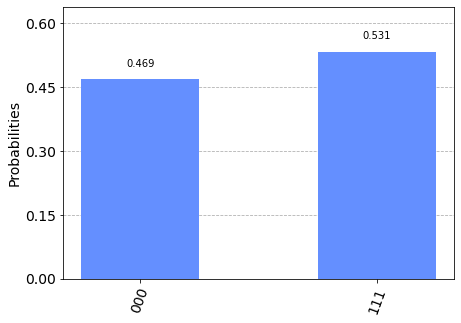

In [14]:
plot_histogram(sim_result.get_counts(circuit))

In [17]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

ibmqfactory.load_account:WARNING:2020-04-19 11:00:37,586: Credentials are already in use. The existing account in the session will be replaced.


In [19]:
job = execute(circuit, backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5e9c21756ad41d00184b4a2f
Job Status: job has successfully run


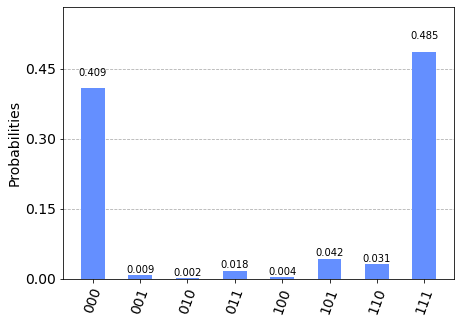

In [20]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [21]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [23]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel='measerrormitigationcal')

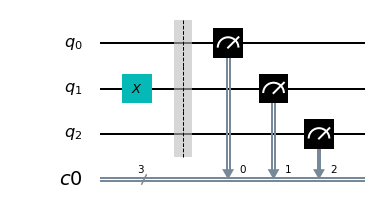

In [25]:
cal_circuits[2].draw(output='mpl')

In [26]:
len(cal_circuits)

8

In [27]:
cal_job = execute(cal_circuits,
                  backend=device,
                  shots=1024,
                  optimization_level=0)

print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5e9c22bc2a44910018bb3934
Job Status: job has successfully run


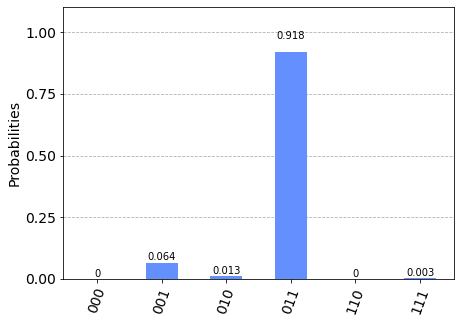

In [31]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [32]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

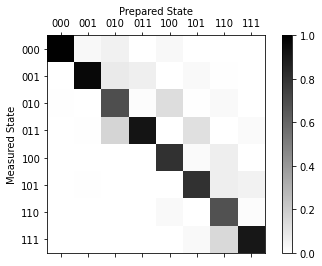

In [33]:
meas_fitter.plot_calibration()

In [34]:
meas_filter = meas_fitter.filter

In [35]:
mitigated_results = meas_filter.apply(device_result)

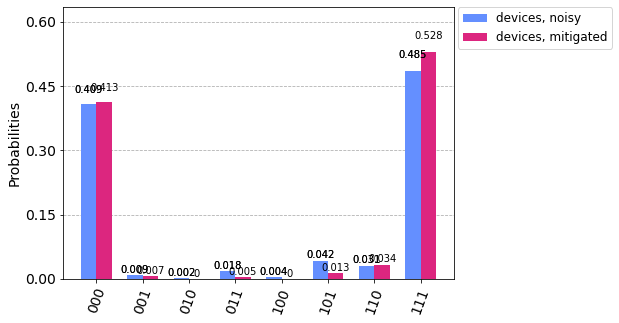

In [36]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_results.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend=['devices, noisy', 'devices, mitigated'])

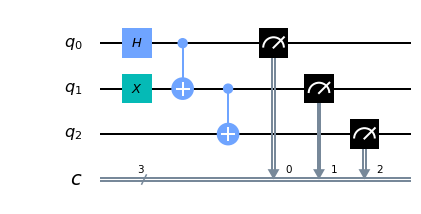

In [39]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2],[0,1,2])
circuit2.draw(output='mpl')

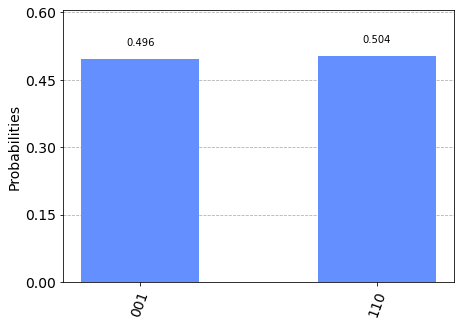

In [41]:
plot_histogram(
    execute(circuit2, backend=simulator, shots = 1024).result().get_counts(circuit2)
)

In [42]:
#run on real hardware
device_counts_2 = execute(circuit2, backend=device, shots=1024).result().get_counts(circuit2)

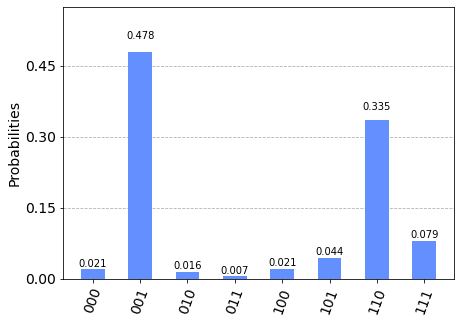

In [43]:
plot_histogram(device_counts_2)

In [44]:
device_mitigated_counts_2 = meas_filter.apply(device_counts_2)

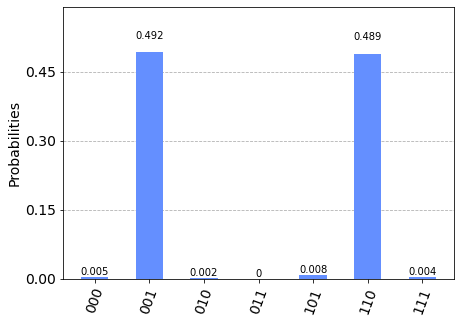

In [46]:
plot_histogram(device_mitigated_counts_2)